# Predicting diabetes in Pima Indians 

---

### Describing the problem 

Pima Indians are North American Indians who are primariily found in the USA - Mexico border regions. They are known to be pre-historic indegenious people of the Hohokam Culture.




<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" alt="traditional pima people"  align=center>

```
Fig1: Traditional Pima Indians
```


<!-- ![traditional pima people](https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg) -->

In todays era, more and more of these people are being exposed to the Western culture, lifestyle and diets because of rapid development and industrialization. Trends in recent times show that this tribe is seeing an increase in the prevalance of diabetes among it's people. Diabetes and obesity have genetic and environmental determinants. 

[Some studies](https://www.cdc.gov/vitalsigns/aian-diabetes/index.html) have proven that Native Americans (American Indians and Alaska Natives) have a greater chance of having diabetes than any other US racial group. Diabetes leads to many health problems down the line. Right now, it is the leading cause of kidney failure, a costly condition that requires dialysis or kidney transplant for survival.

One can only speculate the reasons for this increasing trend if not proven otherwise. 

One of the ways to provide an answer to the speculation is by analysing and reporting trends that are stored in the means of data. This analysis is being performed for research studies catering to *CARDIOVASCULAR AND METABOLIC RISK*. The aim of this analysis is for our stakeholder(here: American Instutes for Research) to be able to determine:
- How we can classify a candidate that is affected with diabetes.
- List the primary factors that determine the presence of diabetes in women of the Pima Indian tribe
- Aid in the early detection and prevention of diabetes in candidates.
- What people belonging to this genome group can do overall to avoid being affected by this ailment.




### Describing the data
Data contains [Diabetes](https://archive.ics.uci.edu/ml/datasets/Diabetes) data of Pima Indians obtained from [UCI Repository of Machine Learning Databases](https://archive.ics.uci.edu/ml/index.php). The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. In particular, all patients here are females at least 21 years old of Pima Indian heritage. 

Adult Pima-Indian populations were examined using oral glucose tolerance tests and assessments for obesity, physical activity, and other risk factors. 

These are the attributes that were gathered: 

| Column Name                	| Description                                                              	|
|----------------------------	|--------------------------------------------------------------------------	|
| Preganancies               	| Number of times pregnant                                                 	|
| Glucose                    	| Plasma glucose concentration a 2 hours in an oral glucose tolerance test 	|
| BloodPressure              	| Diastolic blood pressure (mm Hg)                                         	|
| SkinThickness              	| Triceps skin fold thickness (mm)                                         	|
| Insulin                    	| 2-Hour serum insulin (mu U/ml)                                           	|
| BMI                        	| Body mass index (weight in kg/(height in m)^2)                           	|
| Diabetes Pedigree Function 	| Diabetes pedigree function                                               	|
| Age                        	| Age (years)                                                              	|
| Outcome                    	| Class variable (0 or 1) 268 of 768 are 1, the others are 0               	|

### Analysis of data

<b> 1. Importing libraries </b>

In [2]:
import pandas as pd           # data mnipulation
import numpy as np            # number manipulation/crunching


# Classification report
from sklearn.metrics import classification_report 

# Mean squared error report
from sklearn.metrics import mean_squared_log_error


# Train Test split
from sklearn.model_selection import train_test_split

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix


# keras / deep learning libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

# xgb libraries
from xgboost import plot_importance
import xgboost as xgb


# callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Explanatory libraries 
import lime
from lime import lime_tabular

from sklearn.metrics import mean_squared_error, r2_score

#plotting and visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt  
import seaborn as sns

sns.set()

%matplotlib inline

Let us import the data and check for the usability of data in it's raw form. The data may require cleaning and pre-processing before we apply our model.

In [52]:
data = 'data/diabetes.csv'
df = pd.read_csv(data)
df.shape

(768, 9)

The data contains 768 rows and 9 columns or attributes. Let us examine each of these attributes.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Since the data has been obtained by a legitamate source, it is thorough. All values seem to be populated without any nulls. The datatypes used for each column are also appropriate. Overall, the data does not need any intervention other than outlier management, if any present.

**2. Examining the data**

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The data description give us a lot of information about the mean, min, max and count. 

No outliers have been detected in any of the columns. We can now proceed with our analysis.

**3. Finding the correlation between variables**

Post examining the data, we can determine the following:
- Our target variable is **Outcome**. This is the attribute we want to predict. This variable tells us if a patient is positive or negative for Diabetes.
- Outcome varibale is dependant on the other input variables.
- The correlation between the target variable(Outcome) and different input variables may vary.
- All the input variables may not be useful to our analysis depending on their level of correlation.

One useful way to determine this variable is by mapping the correlation in a matrix.

##### Correlation Matrix

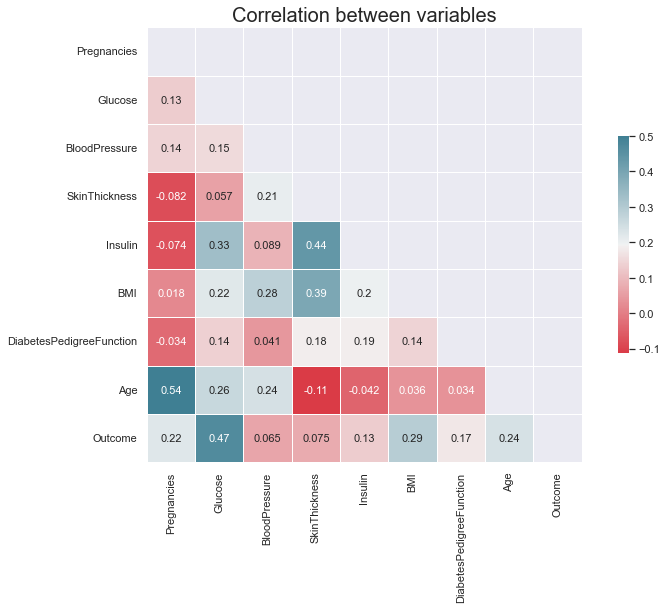

In [6]:
# sns.set(style='white')

correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

ax = sns.heatmap(correlation_matrix, mask=mask, 
                 cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, 
                 square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
                 cbar_kws={'shrink': .5}, ax=ax)

ax.set_title('Correlation between variables', fontsize=20);

The variable that determines the Outcome the most is the **Glucose** level with a correlation of 0.47. This is an obvious finding given that diabetes is foundationally determined by high blood sugar levels in the body. We can use this to prove the authenticity of the input data to some extent.

We notice that a few variables do not have a great impact on our outcome. We discard the variables that have a correlation *lesser than **0.1*** to the outcome. In this case, they are the **BloodPressure** and the **SkinThickness** columns.



In [7]:
df_refined = df.drop(["BloodPressure", "SkinThickness"], axis=1)
df_refined.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


**5. Initiating the Machine Learning Pipeline**

- At first, we aim to choose the features that will determine the outcome. Add it to the X set.
- We will then add our target variable **Outcome** that needs to be predicted into the Y set.
- We will then scale and transform our data to fit our model appropriately.
- This data will be split into *training, test and validation* sets.
- Will be ran through different models. Accuracy and mean squared error will be determined.
- Models will be compared and given preference based on findings.

In [8]:
features = df_refined.columns.tolist()

target = "Outcome"

# Remove target variable
features.remove(target)

X = df_refined[features]
Y = df_refined[target]

# general info about number of features and classes
n_features = X.shape[1]
n_samples = X.shape[0]
n_classes = len(df_refined[target].unique())

print(n_features, n_samples,n_classes)

6 768 2


Transforming data by scaling features to a given range.

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.35294118, 0.74371859, 0.        , 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.        , 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.        , 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.13238771, 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.        , 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.        , 0.45305514, 0.10119556,
        0.03333333]])

In [10]:
# separating data into training (70%), validation (15%) and testset (15%)

X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 550 )

#50% of test set is taken as valiadation set
X_val, X_test, Y_val, Y_test = train_test_split( X_test, Y_test, test_size = 0.5, random_state = 550 )

The split size and random_state are chosen after various iterations to give the **least loss** and **best accuracy**.

## Testing with different Predictive Models for Classification

### Random Forest Classifier

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

Let's say 6 decision tress in this forest predict Diabetes +ve and 3 trees predict Diabetes -ve, the the majority(Diabetes +ve) is chosen as the prediction. 

![random_forest](https://miro.medium.com/max/1381/1*VHDtVaDPNepRglIAv72BFg.jpeg)
```
Image Courtesy: Towards Data Science
```

In [11]:
rf_model = RandomForestClassifier(max_depth = 25, random_state = 450, n_estimators = 20000)

rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=25, n_estimators=20000, random_state=450)

In [12]:
y_test_pred = rf_model.predict(X_test)

print("Test set Accuracy")
print(classification_report(Y_test, y_test_pred, target_names=["Diabetes -ve", "Diabetes +ve"]))

Test set Accuracy
              precision    recall  f1-score   support

Diabetes -ve       0.77      0.90      0.83        68
Diabetes +ve       0.81      0.62      0.71        48

    accuracy                           0.78       116
   macro avg       0.79      0.76      0.77       116
weighted avg       0.79      0.78      0.78       116



The classification report on the test set reveals that:
* The micro average of F1 score is about 0.77, which indicates that the trained model has a classification strength of 77% for the test dataset.
* The accuracy of this model on the test data set is 78%

In [13]:
y_val_pred = rf_model.predict(X_val)

print("Validation set Accuracy")
print(classification_report(Y_val, y_val_pred, target_names=["Diabetes -ve", "Diabetes +ve"]))

Validation set Accuracy
              precision    recall  f1-score   support

Diabetes -ve       0.80      0.91      0.85        76
Diabetes +ve       0.76      0.56      0.65        39

    accuracy                           0.79       115
   macro avg       0.78      0.74      0.75       115
weighted avg       0.79      0.79      0.78       115



The classification report reveals that:
* The micro average of F1 score is about 0.75, which indicates that the trained model has a classification strength of 75% for the test dataset.
* The accuracy of this model on the validation data set is 79%

In [14]:
mse_test = mean_squared_error(Y_test, y_test_pred)
mse_val = mean_squared_error(Y_val, y_val_pred)
print(f"Mean squared error on Test set: {mse_test} \nMean squared error on Validation set: {mse_val}")

Mean squared error on Test set: 0.21551724137931033 
Mean squared error on Validation set: 0.20869565217391303


In [49]:
rf_iterator = RandomForestClassifier(n_estimators=1, max_depth = 25, random_state = 50)
train_loss, test_loss = [], []
for iter in range(50):
    rf_iterator.fit(X_train, Y_train)
    y_test_pred_iter = rf_iterator.predict(X_test)
    y_val_pred_iter = rf_iterator.predict(X_val)
    mse_test = mean_squared_error(Y_test, y_test_pred_iter)
    mse_val = mean_squared_error(Y_val, y_val_pred_iter)
    print("Iteration: {} Test mse: {} Validation mse: {}".format(iter, mse_test, mse_val))
    train_loss += [mse_test]
    test_loss += [mse_val]
    rf_iterator.n_estimators += 500
    rf_iterator.random_state += 500

Iteration: 0 Test mse: 0.25862068965517243 Validation mse: 0.34782608695652173
Iteration: 1 Test mse: 0.21551724137931033 Validation mse: 0.19130434782608696
Iteration: 2 Test mse: 0.20689655172413793 Validation mse: 0.20869565217391303
Iteration: 3 Test mse: 0.21551724137931033 Validation mse: 0.2
Iteration: 4 Test mse: 0.21551724137931033 Validation mse: 0.20869565217391303
Iteration: 5 Test mse: 0.21551724137931033 Validation mse: 0.20869565217391303
Iteration: 6 Test mse: 0.21551724137931033 Validation mse: 0.20869565217391303
Iteration: 7 Test mse: 0.21551724137931033 Validation mse: 0.20869565217391303
Iteration: 8 Test mse: 0.20689655172413793 Validation mse: 0.20869565217391303
Iteration: 9 Test mse: 0.21551724137931033 Validation mse: 0.20869565217391303
Iteration: 10 Test mse: 0.20689655172413793 Validation mse: 0.20869565217391303
Iteration: 11 Test mse: 0.21551724137931033 Validation mse: 0.20869565217391303
Iteration: 12 Test mse: 0.20689655172413793 Validation mse: 0.2
It

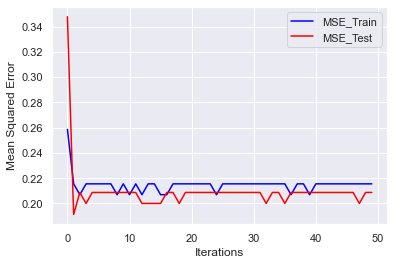

In [50]:
plt.plot(train_loss, color="blue", label="MSE_Train")
plt.plot(test_loss, color="red", label="MSE_Test")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error");
# plt.ylim(0,0.4)
plt.legend()

We have chosen a depth of 25 for the model. Random forest algorithms are notoriously prone to overfitting. The above graph is to examine the presence of overfitting in the model. Overfitting is determined by the difference between the train and test mean squared errors. If the difference is very high, then we can say that the model is overfitted. If the values are almost equal, the area between these two graph lines tends to be lower, which negates the presence of overfitting.
- During the initial few iterations, we have used a very low random_state and n_estimators. As these value is increased, we observe that the MSE lines almost touch each other at instances. 
- This proves that there is negligible difference between MSE_Train and MSE_Test. Therefore we can safely determine that the **model is not subject to overfitting.**

### Validating and explaining the Random Forest Model

### Feature importance of the model



Tree-based algorithms provide us with global variable importance, which means that they can be ranked based on their contribution to the model. 

In this model, it is observed that the `Glucose` variable has the highest influence in the model, followed by `BMI`. We can compare this to our initial correlation matrix.

Pregnancies                 0.096954
Glucose                     0.289830
Insulin                     0.086682
BMI                         0.207408
DiabetesPedigreeFunction    0.153529
Age                         0.165596
dtype: float64

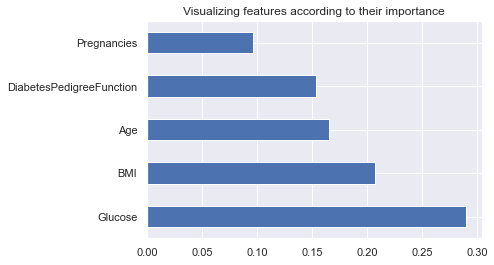

In [17]:
feat_importances = pd.Series(rf_model.feature_importances_, index = features)
feat_importances
feat_importances.nlargest(5).plot(kind = 'barh', title = 'Visualizing features according to their importance')
feat_importances

### Analysing discrepancies using confusion matrix

A confusion matrix gives a view of how many values have been predicted correctly vs. how many predictions are incorrect.

![Confusion Matrix](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)
```
Confusion Matrix Representation


TP- True Positive
TN- True Negative
FP- False Positive
FN- False Negative
```

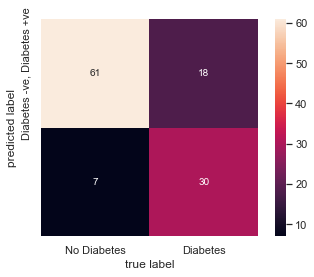

In [18]:
from matplotlib import cm
cm = confusion_matrix(Y_test, y_test_pred)
sns.heatmap(cm.T, square=True, cbar=True, xticklabels=["No Diabetes", "Diabetes"], \
            yticklabels=["Diabetes -ve, Diabetes +ve"], annot=True)

plt.xlabel('true label')
plt.ylabel('predicted label');


The above matrix sugeestes among the test datasets,
- 61 have been classified correctly and 18 have been classified incorrectly as Diabetes +ve 
- 30 have been classified correctly and 7 have been classified incorrectly as Diabetes -ve 

Is this prediction sufficient? Can we obtain better results with other models? Let us examine.

### Neural Networks

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

![neural networks](https://www.knime.com/sites/default/files/3-intro-deep-neural-networks.png)
```
Image Courtesy: KNIME
```

In [19]:
#encoding data to fit into the model
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, np.newaxis]).toarray()

C:\Users\anjan\AppData\Local\Temp/ipykernel_4632/4024090432.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y = enc.fit_transform(Y[:, np.newaxis]).toarray()


In [20]:

# creating the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.4, random_state = 600)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state = 600)

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
callbacks_list = [early_stop]

nn_model = Sequential()

# add the required layers
# YOUR CODE HERE:
nn_model.add(Dense(10, input_dim= len(features), activation='tanh'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(7, activation='tanh'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(3, activation='tanh'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(2, activation='sigmoid'))

# compile the network using: 
# the 'mean_squared_error' as a loss function
# the stochastic gradient descent ('sgd') as the optimization function
# and the 'accuracy' as evaluation metric
# YOUR CODE HERE:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to the data -> learning the model
# YOUR CODE HERE:
# fit model
history = nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, verbose=0,  callbacks = callbacks_list)


Epoch 125: early stopping


Detection of a suitable value (peak) of accuracy, hence the Epoch has been stopped, i.e, the entire data has been passed through the model 125 times, considering randomness.

In [21]:
train_loss, train_acc = nn_model.evaluate(X_train, y_train, verbose=1)
test_loss, test_acc = nn_model.evaluate(X_test, y_test, verbose=1)
val_loss, val_acc = nn_model.evaluate(X_val, y_val, verbose=1)
print('Accuracy: \nTrain: %.3f, Test: %.3f, Validation: %.3f' % (train_acc, test_acc, val_acc))
print('Loss: \nTrain: %.3f, Test: %.3f, Validation: %.3f' % (train_loss, test_loss, val_loss))

2/2 [==============================] - 0s 0s/step - loss: 0.4582 - accuracy: 0.8226
Accuracy: 
Train: 0.763, Test: 0.785, Validation: 0.823
Loss: 
Train: 0.480, Test: 0.472, Validation: 0.458


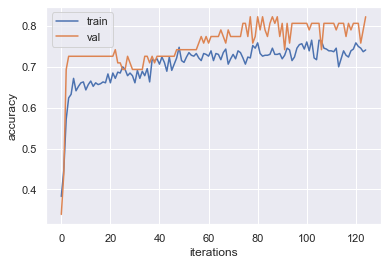

In [22]:
metric = "accuracy"
pyplot.plot(history.history[metric], label='train')
pyplot.plot(history.history["val_" + metric], label='val')
pyplot.ylabel('accuracy', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

When the accuracy increases with the number of iterations, we know our ML model is learning well with every iteration.

The closeness with the train and validation also validates that overfitting is not present.

### XGBoost
XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

![xgboost](https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png)
```
Pic courtesy: GeeksForGeeks
```

In [24]:
#Building the model
xgb_model = xgb.XGBClassifier(
    objective="reg:squarederror",
    random_state=101,
    n_estimators=1000,
    eval_metric="rmse",
    early_stopping_rounds=300,
    tree_method="hist",  # enable histogram binning in XGB
)

# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [25]:
len(y_train)

460

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state = 600)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state = 600)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=False  # Disable logs
)

# len(Y_val)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=300, enable_categorical=False,
              eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', random_state=101, reg_alpha=0, ...)

Computing accuracy for test set

In [27]:
preds = xgb_model.predict(X_test)
xbg_mse = np.sqrt(mean_squared_error(y_test, preds))
# xbg_acc = accuracy(y_test, preds)
print("Mean Squared Error: " + str(xbg_mse))
# computing r^2 score
xgb_r2 =  r2_score(y_test, preds)
print("R^2 Error: " + str(xgb_r2))

Mean Squared Error: 0.48454371185234896
R^2 Error: 0.006081946222791679


In [28]:
print(classification_report(y_test, preds, target_names=["Diabetes -ve", "Diabetes +ve"]))

              precision    recall  f1-score   support

Diabetes -ve       0.80      0.83      0.81        71
Diabetes +ve       0.71      0.66      0.68        44

   micro avg       0.77      0.77      0.77       115
   macro avg       0.75      0.75      0.75       115
weighted avg       0.76      0.77      0.76       115
 samples avg       0.77      0.77      0.77       115



The classification report reveals the micro average of our F1 score, which indicates that our trained XGBoost model has a classification score of **77%**

Computing accuracy for validation set

In [29]:
preds_val = xgb_model.predict(X_val)
xbg_mse = np.sqrt(mean_squared_error(y_val, preds_val))
# xbg_acc = accuracy(y_test, preds)
print("Mean Squared Error: " + str(xbg_mse))
# computing r^2 score
xgb_r2 =  r2_score(y_test, preds)
print("R^2 Error: " + str(xgb_r2))

Mean Squared Error: 0.48245064067700766
R^2 Error: 0.006081946222791679


In [30]:
print(classification_report(y_val, preds_val, target_names=["Diabetes -ve", "Diabetes +ve"]))

              precision    recall  f1-score   support

Diabetes -ve       0.83      0.84      0.84        82
Diabetes +ve       0.61      0.59      0.60        34

   micro avg       0.77      0.77      0.77       116
   macro avg       0.72      0.71      0.72       116
weighted avg       0.77      0.77      0.77       116
 samples avg       0.77      0.77      0.77       116



The classification report reveals the micro average of our F1 score, which indicates that our trained XGBoost model has a classification score of **77%**

f1: Glucose f3: BMI f4: DiabetesPedigreeFunction f0: Pregnancies f2:Insulin


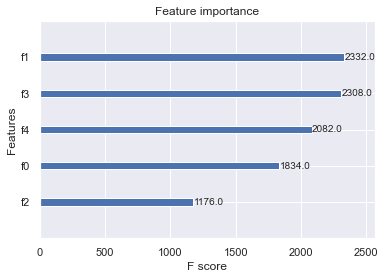

In [31]:
# Checking the feature importance for XGBoost


booster = xgb_model.get_booster()


# provide the importance dictionary to the plotting function
ax = plot_importance(importance, max_num_features=5, importance_type='gain')

print("f1: " + X.columns.tolist()[1], 
      "f3: " + X.columns.tolist()[3], 
      "f4: " + X.columns.tolist()[4], 
      "f0: " + X.columns.tolist()[0],
      "f2:" + X.columns.tolist()[2])

### Choosing a model
#### Model Comparison

| Model          	| Test_accuracy/F1 score 	| Test_MSE            	| Val_accuracy/F1 score 	| Val_MSE             	|
|----------------	|------------------------	|---------------------	|-----------------------	|---------------------	|
| Random Forest  	| 0.78/0.77              	| 0.215 	| 79/75                 	| 0.208 	|
| Neural Network 	| 0.789                  	| Loss = 0.472        	| 0.758                 	| Loss = 0.466        	|
| XGBoost        	| 0.77                   	| 0.484               	| 0.77                  	| 0.482               	|

Since the random forest model gives us the highest balance between train and test data sets, and the %loss or mean squared error is the lowest in this model, we choose this model as the best one for this dataset.

#### Creating a model explainar using LIME

It is not wise to use a model which is not interpretable — that is, unless a human can make sense of it. LIME is short for Local Interpretable Model-Agnostic Explanations. Local refers to local fidelity — i.e., we want the explanation to really reflect the behaviour of the classifier "around" the instance being predicted. Lime is able to explain any model without needing to go into the depths of how the model works, so it is model-agnostic.

![lime](https://deepandshallowml.files.wordpress.com/2019/11/lime_intuition_final.png)

Behind the workings of LIME lies the assumption that ***every complex model is linear on a local scale*** and asserting that it is possible to fit a simple model around a single observation that will mimic how the global model behaves at that locality (Pedersen and Benesty, 2016).



In [32]:
#use train-test split in the Random Forest model
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 550 )
X_val, X_test, Y_val, Y_test = train_test_split( X_test, Y_test, test_size = 0.5, random_state = 550 )

#lime explainer function
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = features, class_names = ['Diabetes -ve', 'Diabetes +ve'], feature_selection = "lasso_path", discretize_continuous = True, discretizer = "quartile", verbose = True, mode = 'classification')

We pass the data present in our initial dataset the presuct the Outcome. We place this in 2 different columns and compare them. A boolean value is assigned based on if the actual value and predicted value are equal or not.

In [33]:
df.iloc[0:5]
df_pred = df
# X_scaled_shortened= X_scaled[:10]

df_pred["PredictedOutcome"] = rf_model.predict(X_scaled)
df_pred['true_equals_pred'] = (df_pred["Outcome"] == df_pred["PredictedOutcome"]) 

df_pred.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PredictedOutcome,true_equals_pred
0,6,148,72,35,0,33.6,0.627,50,1,1,True
1,1,85,66,29,0,26.6,0.351,31,0,0,True
2,8,183,64,0,0,23.3,0.672,32,1,1,True
3,1,89,66,23,94,28.1,0.167,21,0,0,True
4,0,137,40,35,168,43.1,2.288,33,1,1,True


Checking the weight of these predictions.

In [34]:
# df_pred["true_equals_pred"] = df_pred['Outcome'].equals(df_pred['PredictedOutcome'])
df_pred.true_equals_pred.value_counts()

True     719
False     49
Name: true_equals_pred, dtype: int64

In [35]:
df_pred[df_pred.true_equals_pred == False].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PredictedOutcome,true_equals_pred
14,5,166,72,19,175,25.8,0.587,51,1,0,False
38,2,90,68,42,0,38.2,0.503,27,1,0,False
44,7,159,64,0,0,27.4,0.294,40,0,1,False
48,7,103,66,32,0,39.1,0.344,31,1,0,False
67,2,109,92,0,0,42.7,0.845,54,0,1,False


Choosing values with False predictions:
* Value at index 14 is a False negative
* Value at index 67 is a False positive

We will look at Candidate 14 who has been wrongly predicted as diabetes negative. (PredictedOutcome = 0 vs True Outcome= 1)

### Explaining Candidate #14 [False Negative]

In [36]:
df[features].iloc[14]

Pregnancies                   5.000
Glucose                     166.000
Insulin                     175.000
BMI                          25.800
DiabetesPedigreeFunction      0.587
Age                          51.000
Name: 14, dtype: float64

In [37]:
# df_
exp = explainer.explain_instance(X.iloc[14], rf_model.predict_proba)

Intercept 0.19612125707986128
Prediction_local [0.9161496]
Right: 0.50725


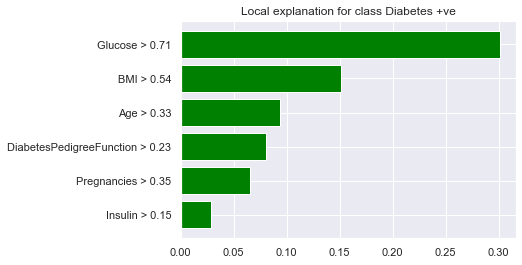

In [38]:
explanation_plot = exp.as_pyplot_figure()

In [39]:
exp.show_in_notebook(show_table = True, show_all = True)

Using lime explanar functions, we can determine the following:
- All the variables have a positive impact on the candidate being Diabetes +ve.
- A glucose level above 0.71 assures that a candidate will be Diabetes +ve. This variable carries the maximum weight. Similarly a BMI above 0.54 also assures a candidate will be Diabetes +ve and vice versa.
- For our candidate, none of these values cross the threshold. Therefore a collective measure should be taken to determine presence of Diabetes. 
- The probability of the candidate #14 being Diabetes +ve is 0.51 as opposed to 0.49 for being diabetes negative. The difference is this proability is extremly small, which may suggest why the patient is Falsely classified Diabetes -ve.

#### Comparing with a True Negative (Candidate #0)

Intercept 0.20660618201860464
Prediction_local [0.88311513]
Right: 0.55235


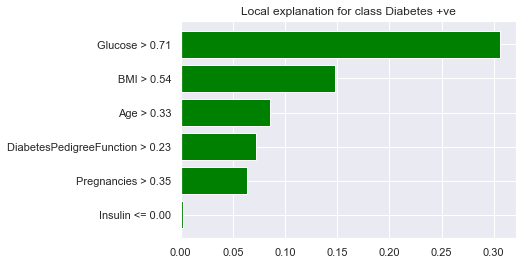

In [40]:
exp = explainer.explain_instance(X.iloc[0], rf_model.predict_proba)
explanation_plot = exp.as_pyplot_figure()

In [41]:
exp.show_in_notebook(show_table = True, show_all = True)

The explanation suggests the probability of the patient to be 55% positive, even though none of the attributes cross the threshold of certainity. Our model correctly predicted this outcome.

## Insights
- Random Forest Algorithm is best suited to such medical datasets. Hence this model is chosen

*For stakeholders:*
- The factor that impacts presence of diabetes the most can be attributed to Glucose levels, followed by BMI, Age, Pedigree, Pregnancies and Insulin(bias explained)
- The main factor to be monitored is glucose levels which can be controlled by diet, exercise, etc.

Other features explained via lime.

## Critical Analysis

Our primary stakeholders as stated prior, would be American Research Organisations.

#### Domain implications

This model is designed for reasearch purposes in the medical domain. 

As we all can presume, models in the medical domain needs to be highly accurate and can have serious implications if not. With an accuracy of 0.79 for our best model, we can safely say there may be atleast 21 wrongly predicted values per 100 instances of data.

Therefore, this model **should not be used in real candidates to diagnose the presence of diabetes.** This model cannot be deemed to be used in medical facilities like holspitals and diagnostic clinics. It's use must be limited to research purposes.

#### Genomic implications

This data and model is designed around people of a perticular tribe with a certain similar genomic code. This model may not be accurate for candidates having different DNA or genomic attributes. It is designed specifically keeping a certain audience in mind.

#### Privacy and consent implications

Use of medical data and genetic related data is extremely sensitive and private. The candidates should provide full consent for the collection of this data. The following factors must be kept in mind prior to data collection:
- The full consent of the (volenteering) candidate must be provided and must be liabale to proof at any point of time.
- Data must be collected in such a way that individual candidates cannot be identified. This data is used purely for analysis.
- No genetic information of footprint must be recorded that will prove the candidates identity or the identity of those closely related to the candidate.

#### Bias obeserved

Bias is a phenomenon that occurs when an algorithm produces results that are systemically prejudiced due to erroneous assumptions in the machine learning process. Using this data comes with many visible biases. A few of them are listed below:
* **Selection bias:** The data was run through different models and iterated through various parameters. Yet in this analysis, the highest achievable accuracy was 79%, which is not too great to predict the presence of a medical ailment. One of the factors can be due to the lack of sufficient data, in terms of both features and values. The dataset that the model was trained over was in 100s which is not enough values. The model only selected 6 features, which may not be greatly deterministic to the value of the outcome.
* **Measurement bias:** The data recorded is only measured for people of a perticular genome/trible. It is also modelled only around women. The credibilty of the model cannot be ascertained to people outside this specific group due to varying genetic information.
* **Observer bias:** It has been observed that the `Insulin` column is mostly not populated/ populated with 0. This is not a correct indication since it is practically impossible for a living human being to have 0 insulin levels. Insulin is also highly determininstic of the presence of diabetes. Having this value to be 0 for most entries impacts the model negatively.

## Risk Assessment Analysis 

The risks of using the data for medical diagnosis is extremely high. The model does not provide enough accuracy to be used in the real world
- It may cause distress in a candidate who has been wrongly diagnosed.
- It cannot be used in people with a different pedigree/genomic structure because this analysis does nit include them.
- It may lead false negative candidates to negligence which may be extremely harmful for their health. If not taken care of, it may lead to various other ailments and in the worst scenario, may lead to death.
- Should only be used on women of the pima indian tribe.

Therefore, the handling of this data should be very cautious and used only in research.